In [1]:
# import libraries
import time
import random as r
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
# settings
sns.reset_orig
sns.set_style('darkgrid')
sns.set_palette('Set1')

np.set_printoptions(linewidth=200)

In [3]:
# initialize the random state using a seed
epoch = int(time.time())
r.seed(epoch)

print(f'Seeded at {epoch}.')

Seeded at 1653251584.


In [4]:
# create random coordinate function (-100 < X < 100)
rcoord = lambda: r.random() * 100 * (-1 if r.randrange(2) else 1)

In [5]:
# create set of customers
i_data = pd.DataFrame()
len_ = 100

i_data['X'] = [rcoord() for _ in range(len_)]
i_data['Y'] = [rcoord() for _ in range(len_)]
i_data['Demand'] = [r.random() + r.randrange(50, 100) for _ in range(len_)]

i_data.head(10)

,X,Y,Demand
0,-78.126867,92.104536,93.929652
1,-81.101555,-25.776821,88.523769
2,92.999908,60.207778,87.547742
3,13.976062,4.610812,51.724813
4,-29.325919,79.395394,77.632578
5,-5.672252,97.997210,75.035252
6,70.102319,58.457724,93.671583
7,-59.802250,83.427397,77.159235
8,35.185982,-69.910386,77.278877
9,-97.794396,99.275558,65.182532


In [6]:
# create set of candidate locations
j_data = pd.DataFrame()
len_ = 20

j_data['X'] = [rcoord() for _ in range(len_)]
j_data['Y'] = [rcoord() for _ in range(len_)]

j_data.head(10)

,X,Y
0,-79.955832,2.795031
1,7.989720,59.082074
2,-94.825318,-64.886897
3,45.587977,-81.765103
4,-38.977542,94.406575
5,27.547890,18.832676
6,46.702931,-41.243549
7,90.169263,-71.417897
8,-10.176710,49.999065
9,57.647626,67.961087


Text(0.5, 1.0, 'Customer and Facility Locations')

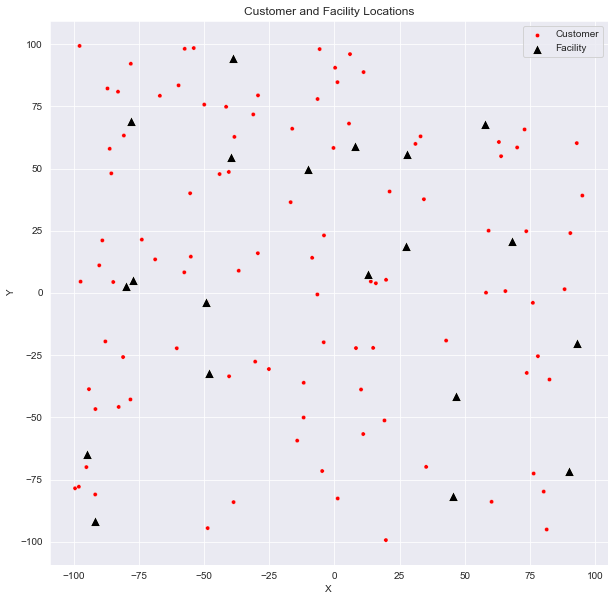

In [7]:
# plot the customers and facilities
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x='X', y='Y', data=i_data, size=1, color='red', legend=False, label="Customer")
sns.scatterplot(x='X', y='Y', data=j_data, s=100, color='black', marker='^', label="Facility")
plt.legend()
plt.title('Customer and Facility Locations')

In [8]:
# create distance matrix
eucl = lambda x1, y1, x2, y2: ((x1 - x2)**2 + (y1 - y2)**2)**0.5

i_loc = i_data[['X', 'Y']].values
j_loc = j_data[['X', 'Y']].values

dist_ij = np.array([[eucl(i[0],i[1],j[0],j[1]) for j in j_loc] for i in i_loc])
dist_ij

array([[ 89.32823086,  92.23095792, 157.87700417, ..., 127.90875643,  99.88306465, 124.18082084],
       [ 28.59481412, 123.03774658,  41.44803689, ...,  33.67469282,  38.83084794,  99.93571333],
       [182.23586798,  85.01764172, 225.6700983 , ..., 168.63293786, 155.9014628 ,  95.62239846],
       ...,
       [112.92379133, 110.90109083, 114.83203658, ...,  69.88486821,  83.46780308,  59.3508085 ],
       [ 79.15220467,  79.82670299, 101.29698069, ...,  45.65882157,  48.02736071,  32.48862839],
       [ 86.25358179, 110.94229967,  84.32656251, ...,  40.40231427,  59.76333112,  62.96521145]])

In [9]:
# save new data to files
with pd.ExcelWriter('data.xlsx', mode='w') as writer:
    i_data.to_excel(writer, sheet_name='i_data', index=False)
    j_data.to_excel(writer, sheet_name='j_data', index=False)
    pd.DataFrame(dist_ij).to_excel(writer, sheet_name='dist_ij', index=False)
    
print('Done')

Done
